In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import joblib

In [2]:
df = pd.read_csv("cybersecurity_attacks.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (40000, 25)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,30-05-2023 06:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,26-08-2020 07:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,13-11-2022 08:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,02-07-2023 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,16-07-2023 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [3]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [4]:
df['Payload Data'] = df['Payload Data'].fillna("empty")

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\bkeer\OneDrive\Documents\dsti2025\ML Python Project - 1\Project 1\cybersecurity_attacks.csv")
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,30-05-2023 06:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,26-08-2020 07:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,13-11-2022 08:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,02-07-2023 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,16-07-2023 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [21]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [24]:
df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Timestamp                     0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Attack Type                   0
Payload Data                  0
Anomaly Scores                0
Severity Level                0
Action Taken                  0
Attack Signature              0
User Information              0
Geo-location Data             0
Network Segment               0
Device Information            0
Log Source                    0
dtype: int64

In [25]:
df['Attack Type'].value_counts()

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attack Type Encoded'] = le.fit_transform(df['Attack Type'])

<Axes: xlabel='Attack Type'>

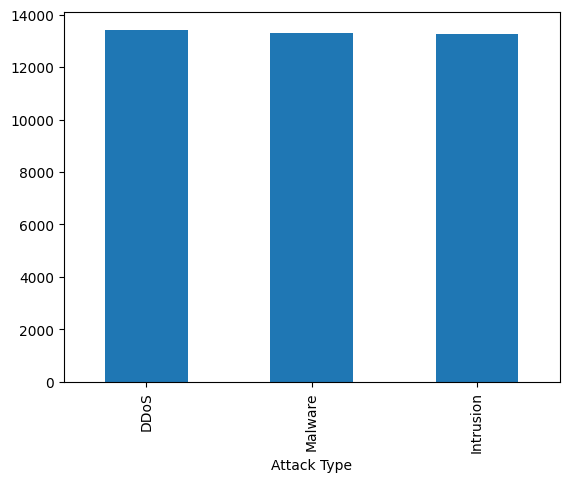

In [27]:
df['Attack Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Severity Level', ylabel='count'>

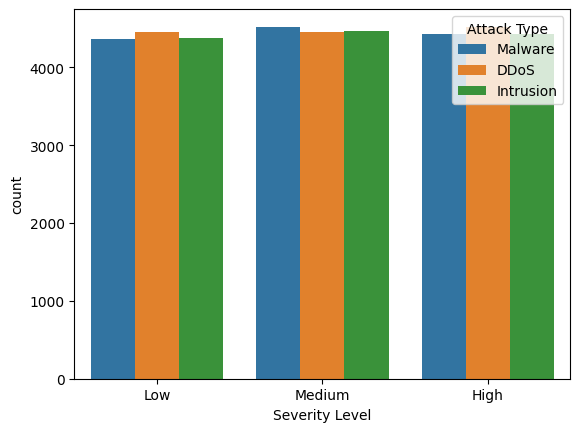

In [28]:
sns.countplot(x='Severity Level', hue='Attack Type', data=df)

In [29]:
df['Timestamp'] = pd.to_datetime(
    df['Timestamp'],
    format="%d-%m-%Y %H:%M"
)

In [30]:
df['Timestamp'] = pd.to_datetime(
    df['Timestamp'],
    format="%d-%m-%Y %H:%M"
)
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

In [31]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Attack Type Encoded,Hour,Day,Month
0,2023-05-30 06:33:00,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,2,6,30,5
1,2020-08-26 07:08:00,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,2,7,26,8
2,2022-11-13 08:23:00,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,0,8,13,11
3,2023-07-02 10:38:00,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,2,10,2,7
4,2023-07-16 13:11:00,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,0,13,16,7


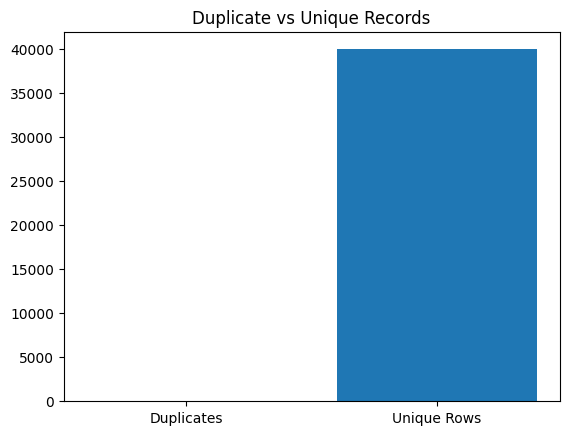

In [32]:
duplicate_count = df.duplicated().sum()

plt.bar(["Duplicates", "Unique Rows"],
        [duplicate_count, len(df) - duplicate_count])
plt.title("Duplicate vs Unique Records")
plt.show()

In [33]:
col_summary = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values,
    "Unique Values": df.nunique().values
})

col_summary

,Column,Data Type,Missing Values,Unique Values
0,Timestamp,datetime64[ns],0,39573
1,Source IP Address,object,0,40000
2,Destination IP Address,object,0,40000
3,Source Port,int64,0,29761
4,Destination Port,int64,0,29895
5,Protocol,object,0,3
6,Packet Length,int64,0,1437
7,Packet Type,object,0,2
8,Traffic Type,object,0,3
9,Payload Data,object,0,40000


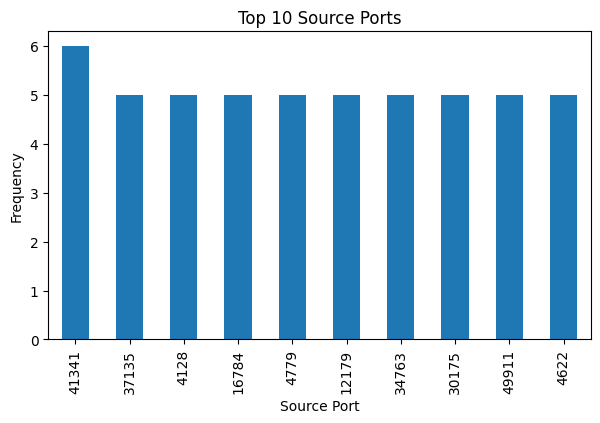

In [34]:
top_ports = df["Source Port"].value_counts().head(10)

top_ports.plot(kind="bar", figsize=(7,4))
plt.title("Top 10 Source Ports")
plt.xlabel("Source Port")
plt.ylabel("Frequency")
plt.show()

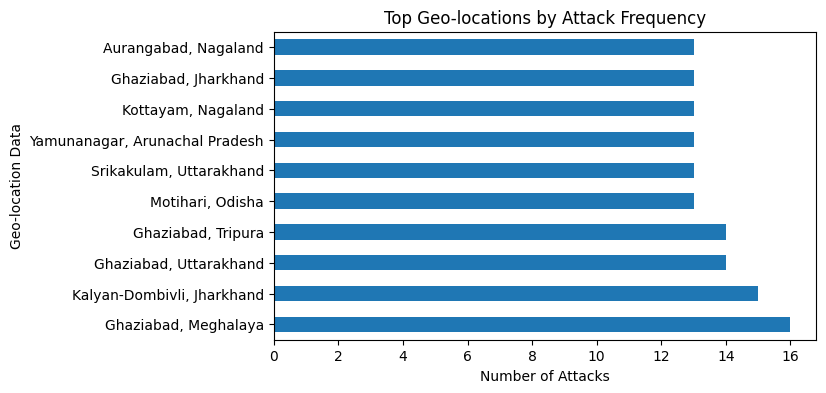

In [35]:
geo_counts = df["Geo-location Data"].value_counts().head(10)

geo_counts.plot(kind="barh", figsize=(7,4))
plt.title("Top Geo-locations by Attack Frequency")
plt.xlabel("Number of Attacks")
plt.show()

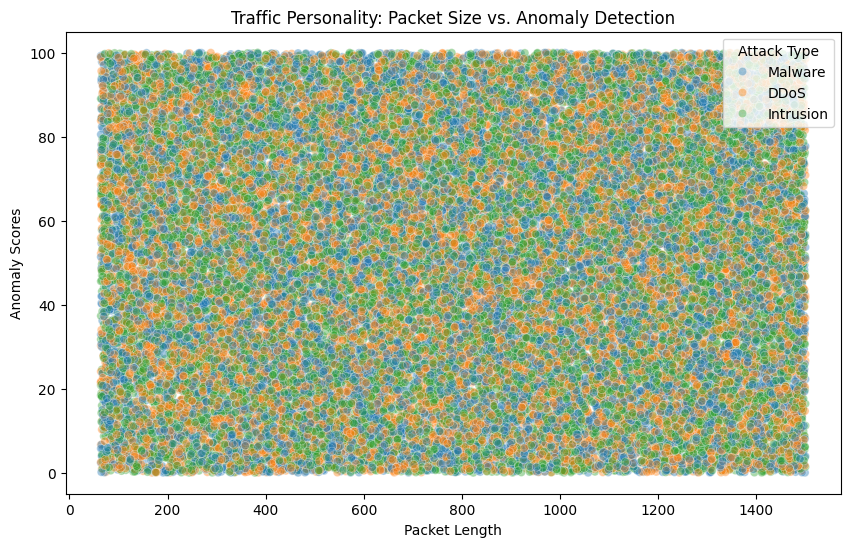

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Packet Length', y='Anomaly Scores', hue='Attack Type', alpha=0.4)
plt.title("Traffic Personality: Packet Size vs. Anomaly Detection")
plt.show()

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('cybersecurity_attacks.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

cols_to_fill = ['Malware Indicators', 'Alerts/Warnings', 'Firewall Logs', 'IDS/IPS Alerts', 'Proxy Information']
for col in cols_to_fill:
    df[col] = df[col].fillna('None')


num_features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores', 'Hour', 'DayOfWeek']
cat_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 
                'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 
                'Log Source']
text_feature = 'Payload Data'

X = df[num_features + cat_features + [text_feature]]
y = df['Attack Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),                
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features), 
        ('text', TfidfVectorizer(max_features=50), text_feature)      
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

print("Training the pipeline... Please wait...")
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("\n--- Pipeline Results ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\Users\bkeer\AppData\Local\Temp\ipykernel_9484\769056397.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Training the pipeline... Please wait...

--- Pipeline Results ---
Accuracy Score: 0.3307

Classification Report:
              precision    recall  f1-score   support

        DDoS       0.33      0.37      0.35      2636
   Intrusion       0.34      0.32      0.33      2721
     Malware       0.32      0.30      0.31      2643

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



In [38]:
# ============================================
# Advanced ML Pipeline
# RandomForest + OneHot + TFIDF + Scaling
# ============================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ============================================
# 1. Load Dataset
# ============================================

df = pd.read_csv("cybersecurity_attacks.csv")

# Remove duplicates
df = df.drop_duplicates()

print("Dataset Shape:", df.shape)

# ============================================
# 2. Define Target
# ============================================

target_column = "Attack Type"

X = df.drop(columns=[target_column])
y = df[target_column]

# ============================================
# 3. Feature Groups
# ============================================

numeric_features = [
    'Source Port',
    'Destination Port',
    'Packet Length',
    'Anomaly Scores'
]

categorical_features = [
    'Protocol',
    'Packet Type',
    'Traffic Type',
    'Severity Level',
    'Malware Indicators',
    'Alerts/Warnings',
    'Action Taken',
    'Network Segment',
    'Log Source',
    'Firewall Logs',
    'IDS/IPS Alerts'
]

text_feature = "Payload Data"

# ============================================
# 4. Preprocessing Pipelines
# ============================================

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

text_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=50))
])

# ============================================
# 5. Column Transformer
# ============================================

preprocessor = ColumnTransformer(

    transformers=[

        ("num", numeric_pipeline, numeric_features),

        ("cat", categorical_pipeline, categorical_features),

        ("txt", TfidfVectorizer(max_features=50), text_feature)

    ]

)

# ============================================
# 6. Train/Test Split
# ============================================

X_train, X_test, y_train, y_test = train_test_split(

    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y

)

print("Train Size:", X_train.shape)
print("Test Size:", X_test.shape)

# ============================================
# 7. Random Forest Model
# ============================================

rf = RandomForestClassifier(

    n_estimators=500,
    max_depth=25,
    min_samples_split=3,
    random_state=42,
    n_jobs=-1

)

# ============================================
# 8. Full Pipeline
# ============================================

model = Pipeline(

    steps=[
        ("preprocessing", preprocessor),
        ("classifier", rf)
    ]

)

# ============================================
# 9. Train Model
# ============================================

model.fit(X_train, y_train)

print("\nModel Training Complete")

# ============================================
# 10. Predictions
# ============================================

y_pred = model.predict(X_test)

# ============================================
# 11. Evaluation
# ============================================

print("\n========== RESULTS ==========")

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Dataset Shape: (40000, 25)
Train Size: (32000, 24)
Test Size: (8000, 24)

Model Training Complete

========== RESULTS ==========

Accuracy:
0.334

Classification Report:
              precision    recall  f1-score   support

        DDoS       0.34      0.39      0.37      2686
   Intrusion       0.34      0.30      0.32      2653
     Malware       0.32      0.31      0.32      2661

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000


Confusion Matrix:
[[1048  741  897]
 [ 966  789  898]
 [1040  786  835]]


Dataset Shape: (40000, 25)

Top Geo Locations:
Geo-location Data
Ghaziabad, Meghalaya              16
Kalyan-Dombivli, Jharkhand        15
Ghaziabad, Uttarakhand            14
Ghaziabad, Tripura                14
Motihari, Odisha                  13
Srikakulam, Uttarakhand           13
Yamunanagar, Arunachal Pradesh    13
Kottayam, Nagaland                13
Ghaziabad, Jharkhand              13
Aurangabad, Nagaland              13
Name: count, dtype: int64


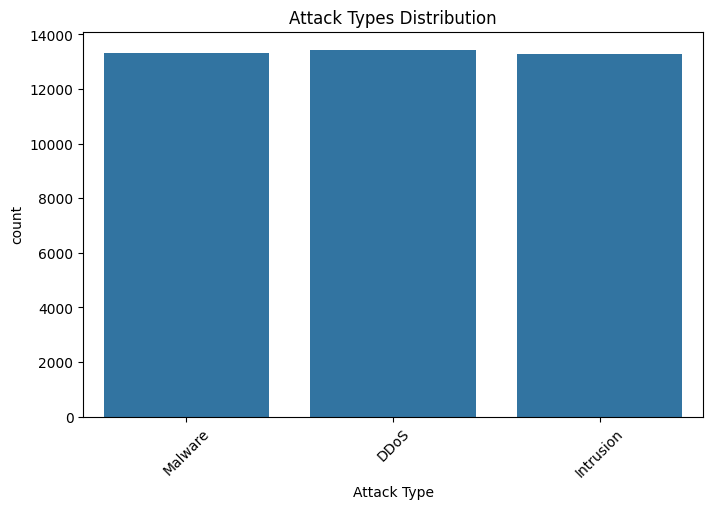

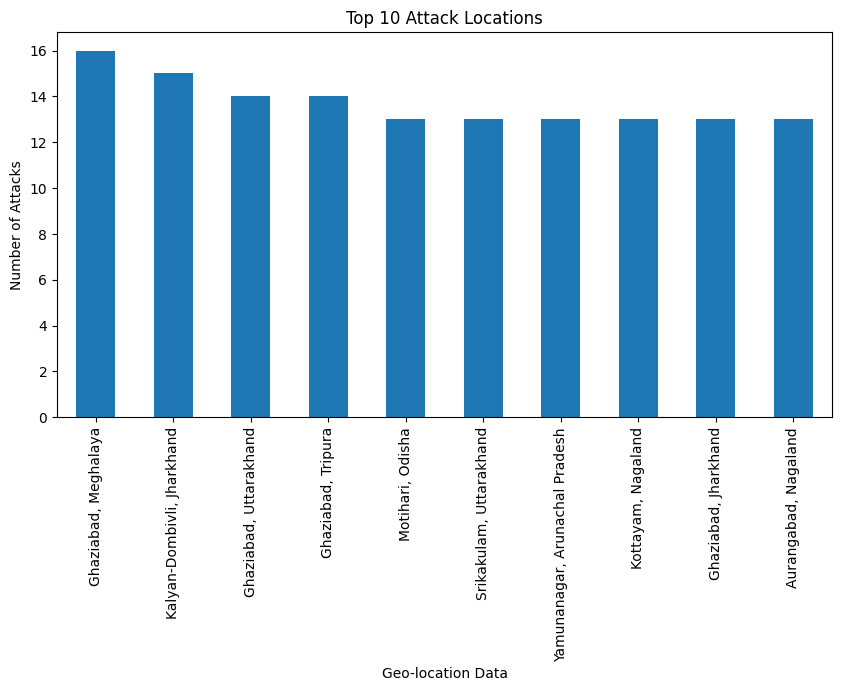

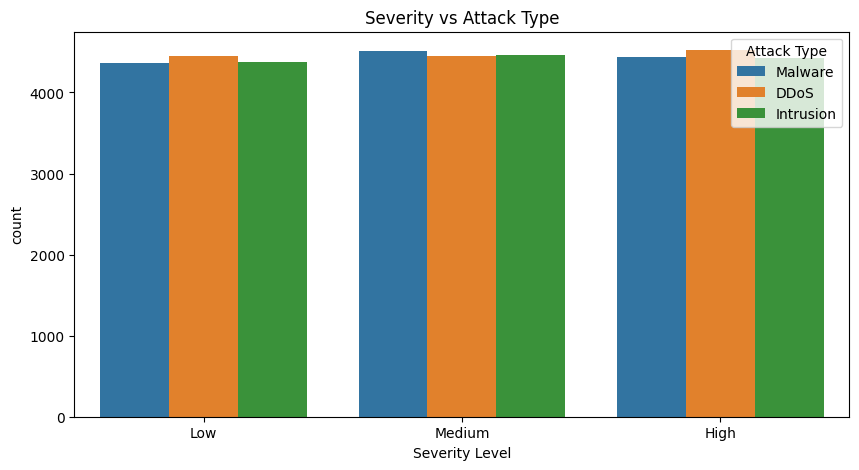


===== RESULTS =====
Accuracy:
0.33375

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.35      0.35      2686
           1       0.33      0.31      0.32      2653
           2       0.33      0.34      0.33      2661

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000


Confusion Matrix:
[[941 860 885]
 [875 835 943]
 [908 859 894]]


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = pd.read_csv("cybersecurity_attacks.csv")

df = df.drop_duplicates()

print("Dataset Shape:", df.shape)

df = df.fillna("Unknown")

le_target = LabelEncoder()
df['Attack Type Encoded'] = le_target.fit_transform(df['Attack Type'])

print("\nTop Geo Locations:")
print(df['Geo-location Data'].value_counts().head(10))

plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x='Attack Type'
)

plt.xticks(rotation=45)
plt.title("Attack Types Distribution")
plt.show()
plt.figure(figsize=(10,5))

df['Geo-location Data'].value_counts().head(10).plot(kind='bar')

plt.title("Top 10 Attack Locations")
plt.ylabel("Number of Attacks")
plt.show()
plt.figure(figsize=(10,5))

sns.countplot(
    data=df,
    x='Severity Level',
    hue='Attack Type'
)

plt.title("Severity vs Attack Type")

plt.show()

target_column = "Attack Type Encoded"

X = df.drop(columns=["Attack Type","Attack Type Encoded"])
y = df[target_column]

for col in X.columns:
    
    if X[col].dtype == "object":
        
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))



X_train,X_test,y_train,y_test = train_test_split(

    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y

)

rf = RandomForestClassifier(

    n_estimators=600,
    max_depth=25,
    random_state=42,
    n_jobs=-1

)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print("\n===== RESULTS =====")

print("Accuracy:")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

In [42]:
#PCA + SMOTE + RandomForest Model

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

df = pd.read_csv("cybersecurity_attacks.csv")

df = df.drop_duplicates()

print("Dataset Shape:", df.shape)

target_column = "Attack Type"

X = df.drop(columns=[target_column])
y = df[target_column]

for col in X.columns:
    
    if X[col].dtype == "object":
        
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(

    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42

)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=20)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original Features:", X_train.shape[1])
print("After PCA:", X_train_pca.shape[1])

smote = SMOTE(random_state=42)

X_train_balanced,y_train_balanced = smote.fit_resample(
    X_train_pca,
    y_train
)

print("After SMOTE:", np.bincount(y_train_balanced))

rf = RandomForestClassifier(

    n_estimators=700,
    max_depth=25,
    random_state=42,
    n_jobs=-1

)

rf.fit(X_train_balanced,y_train_balanced)

y_pred = rf.predict(X_test_pca)

print("\n======= RESULTS =======")

print("Accuracy:")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Dataset Shape: (40000, 25)
Original Features: 24
After PCA: 20
After SMOTE: [10742 10742 10742]

======= RESULTS =======
Accuracy:
0.335875

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.33      0.33      2686
           1       0.34      0.34      0.34      2653
           2       0.33      0.34      0.33      2661

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000


Confusion Matrix:
[[879 888 919]
 [836 907 910]
 [865 895 901]]


In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("cybersecurity_attacks.csv")

df = df.drop_duplicates()

# Target
X = df.drop(columns=["Attack Type"])
y = df["Attack Type"]

# Encode text
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y)

# Split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Model
rf1 = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf1.fit(X_train,y_train)

pred1 = rf1.predict(X_test)

print("\n Accuracy:")
print(accuracy_score(y_test,pred1))


 Accuracy:
0.340375


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf2 = RandomForestClassifier(

    n_estimators=500,
    max_depth=20,
    random_state=42,
    n_jobs=-1

)

rf2.fit(X_train_scaled,y_train)

pred2 = rf2.predict(X_test_scaled)

print("\n Accuracy:")
print(accuracy_score(y_test,pred2))


 Accuracy:
0.336875


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote,y_smote = smote.fit_resample(
    X_train_scaled,
    y_train
)

rf3 = RandomForestClassifier(

    n_estimators=700,
    max_depth=25,
    random_state=42,
    n_jobs=-1

)

rf3.fit(X_smote,y_smote)

pred3 = rf3.predict(X_test_scaled)

print("\nMODEL 3 Accuracy:")
print(accuracy_score(y_test,pred3))


MODEL 3 Accuracy:
0.323875


In [ ]:
# GRIDSEARCH + RANDOMFOREST MODEL

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.combine import SMOTETomek
df = pd.read_csv("cybersecurity_attacks.csv")

df = df.drop_duplicates()

print("Dataset Shape:", df.shape)

X = df.drop(columns=["Attack Type"])
y = df["Attack Type"]

for col in X.columns:
    
    if X[col].dtype == "object":
        
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(

    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42

)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote_tomek = SMOTETomek(random_state=42)

X_balanced,y_balanced = smote_tomek.fit_resample(
    X_train_scaled,
    y_train
)

print("Balanced Classes:", np.bincount(y_balanced))

param_grid = {

    'n_estimators': [300,500,800],
    'max_depth': [20,30,40],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2]

}

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(

    rf,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2

)

grid.fit(X_balanced,y_balanced)

print("\nBest Parameters:")
print(grid.best_params_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("\n====== FINAL RESULTS ======")

print("Accuracy:")
print(accuracy_score(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Dataset Shape: (40000, 25)
Balanced Classes: [7728 7704 7736]
Fitting 3 folds for each of 36 candidates, totalling 108 fits
